<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/plt_R_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

https://cran.r-project.org/

![R](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/100px-R_logo.svg.png)

# **Gráficos básicos con ggplot2**


**ggplot2 es la librería predilecta utilizada en R, ya que es elegante y versatil.**

**ggplot2 utiliza una *gramática de gráficos*, podríamos decir que:**

un gráfico = theme + coordinates + facets + geometries + scales + statistics + mapping + data

1. **Data**: son los datos a graficar
2. **Aesthetics**: es el mapeo de los elementos (qué queremos graficar) y los elementos estéticos como color, forma, tamaño
3. **Geometries**: determina el tipo de visualización (barras, puntos, líneas)
4. **Facets**: divisiones de los gráficos en subconjuntos
5. **Statistics**: permiten transformar los datos (media, cuartil, mediana)
6. **Coordinates**: transformaciones en el espacio y características de los ejes
7. **Themes**: temas como el color, encabezado, tamaño, ejes

Donde los escenciales son: *Data, Aesthetics, Geometries*

## **Habilitando los módulos necesarios**

In [1]:
require(ggplot2)

Loading required package: ggplot2



## **Obteniendo datos**

Se van a obtener datos de un archivo .CSV alojado en un repositorio público.

In [2]:
mpg <- mpg

In [3]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


|Variable|	Type|	Description|	Details|
|--------|------|------------|---------|
|manufacturer|	string|	car manufacturer|	15 manufacturers|
|model|	string|	model name|	38 models|
|displ|	numeric|	engine displacement in liters	|1.6 - 7.0, median: 3.3|
|year	|integer	|year of manufacturing |	1999, 2008|
|cyl|	integer|	number of cylinders	|4, 5, 6, 8|
|trans	|string	|type of transmission|	automatic, manual (many sub types)|
|drv	|string	|drive type	|f, r, 4, f=front wheel, r=rear wheel, 4=4 wheel|
|cty	|integer	|city mileage|	miles per gallon|
|hwy	|integer	|highway mileage|	miles per gallon|
|fl	|string	|fuel type	|5 fuel types (diesel, petrol, electric, etc.)|
|class|	string	|vehicle class	|7 types (compact, SUV, minivan etc.)|

In [4]:
dim(mpg)

[1] 234  11

### **Descripción del DataFrame**

In [6]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


Los nombres de las columnas del DataFrame...

In [7]:
colnames(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

Los fabricantes...

In [8]:
table(mpg$manufacturer)


      audi  chevrolet      dodge       ford      honda    hyundai       jeep 
        18         19         37         25          9         14          8 
land rover    lincoln    mercury     nissan    pontiac     subaru     toyota 
         4          3          4         13          5         14         34 
volkswagen 
        27 

## **Graficos básicos...**

Estos parámetros son para dar un tamaño específico al gráfico.

In [5]:
options(repr.plot.width=12, repr.plot.height=7)

### **Qplot**

#### **Fabricantes**

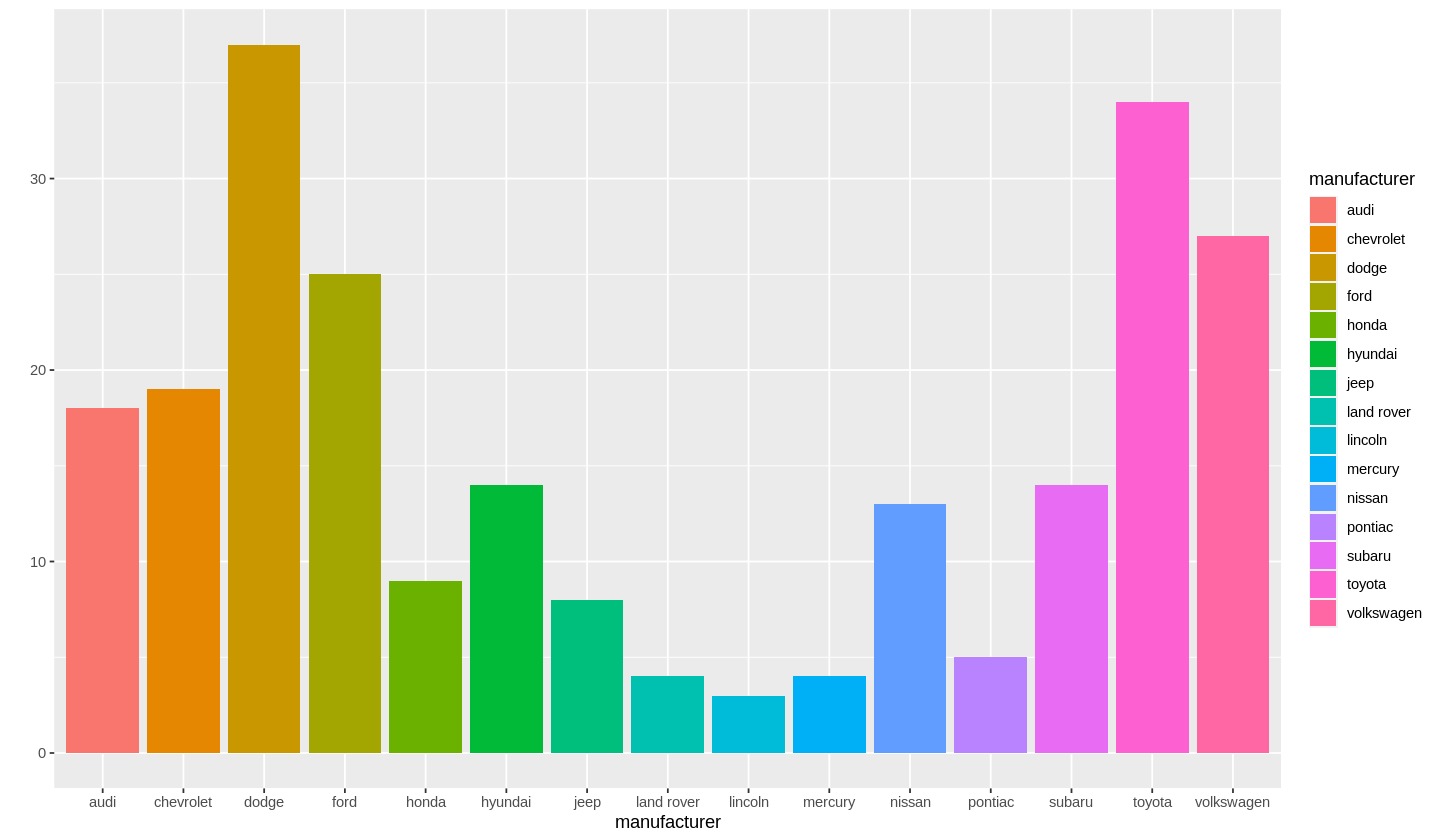

In [9]:
qplot(manufacturer, data=mpg, geom="bar", fill=manufacturer)

#### **Año de Fabricación**

In [10]:
table(mpg$year)


1999 2008 
 117  117 

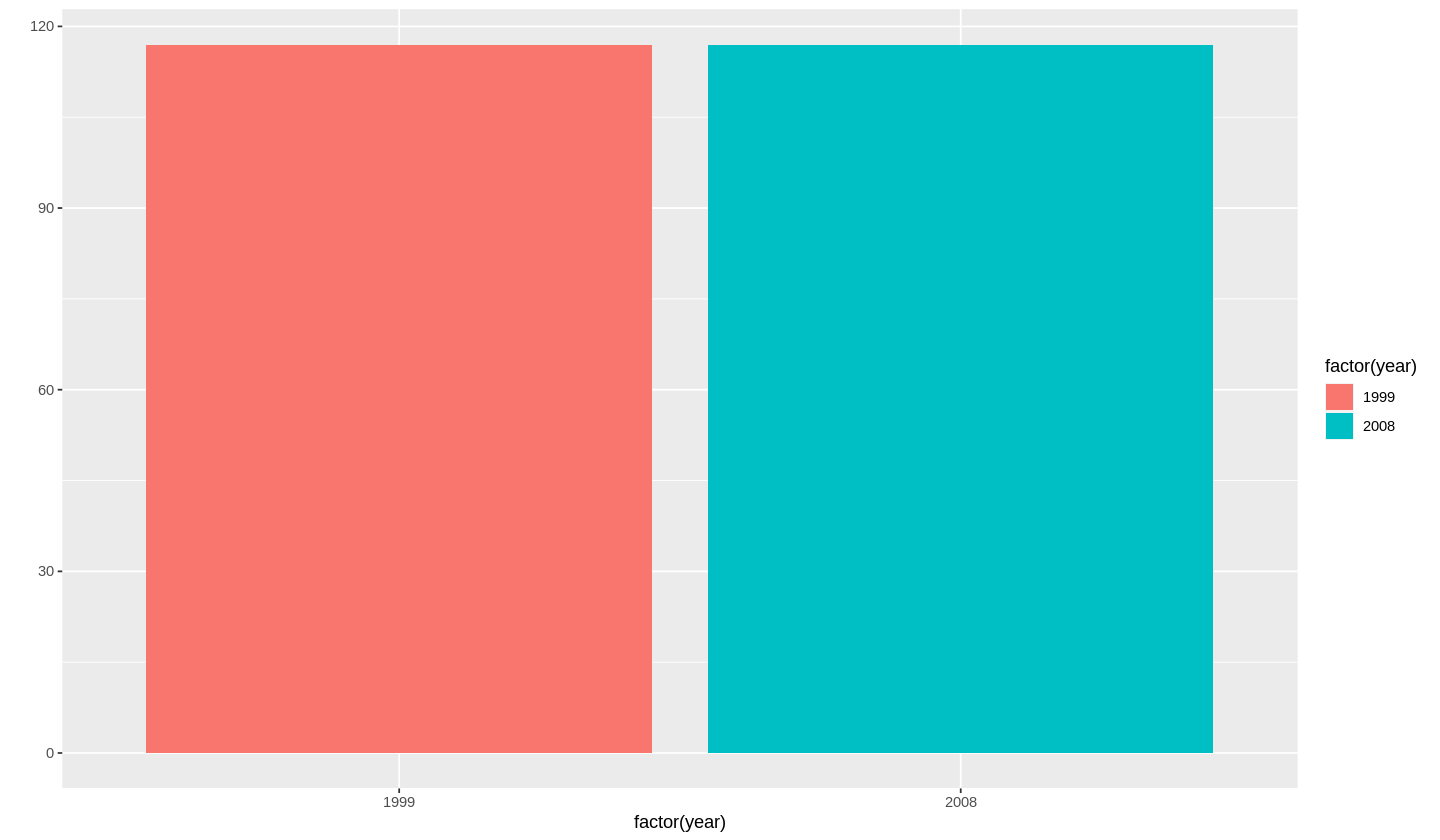

In [11]:
qplot(factor(year), data=mpg, geom="bar", fill=factor(year))

#### **Cilindros**

In [12]:
table(mpg$cyl)


 4  5  6  8 
81  4 79 70 

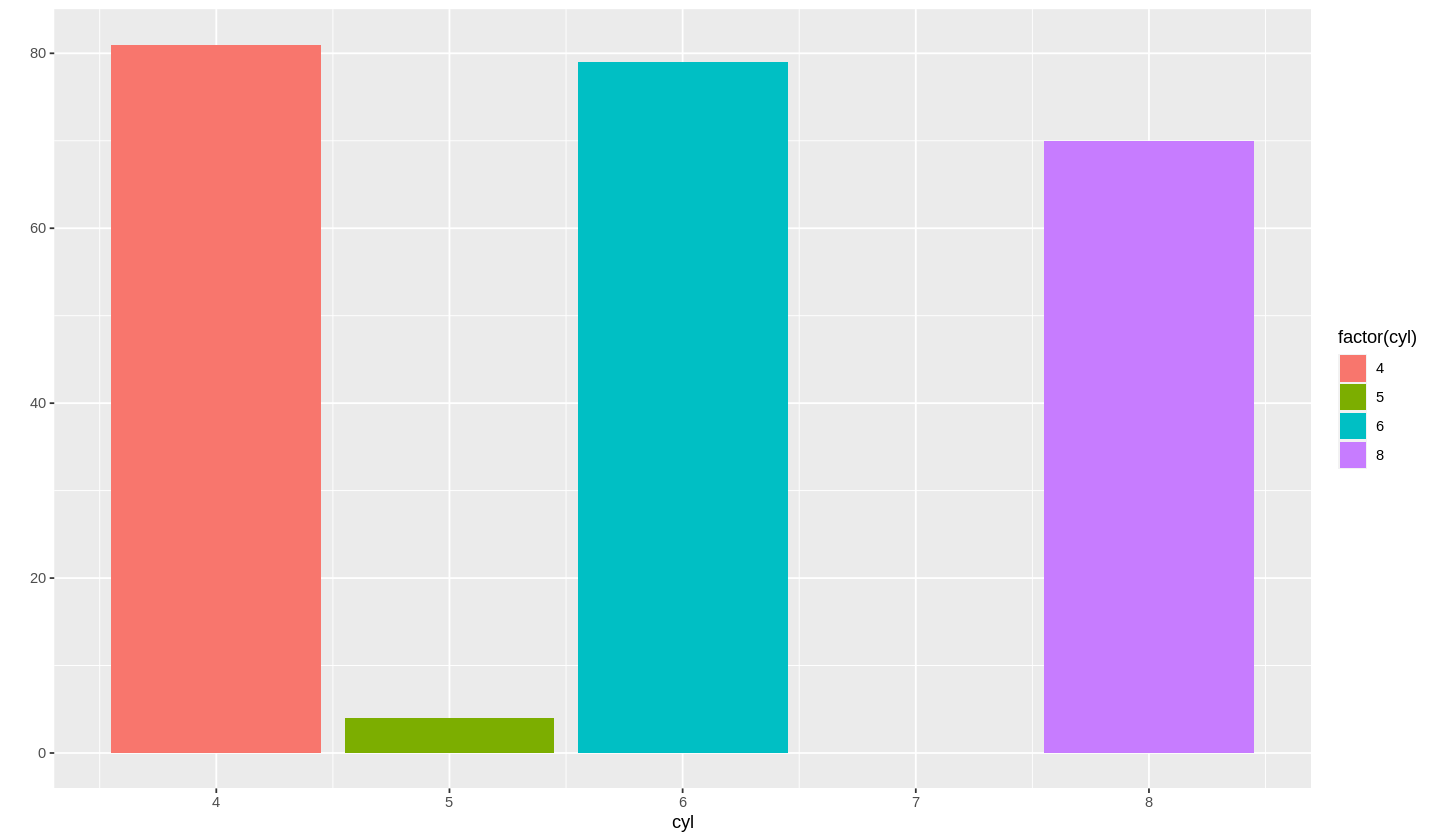

In [13]:
qplot(cyl, data=mpg, geom="bar", fill=factor(cyl))

#### **Transmisión**

In [14]:
table(mpg$trans)


  auto(av)   auto(l3)   auto(l4)   auto(l5)   auto(l6)   auto(s4)   auto(s5) 
         5          2         83         39          6          3          3 
  auto(s6) manual(m5) manual(m6) 
        16         58         19 

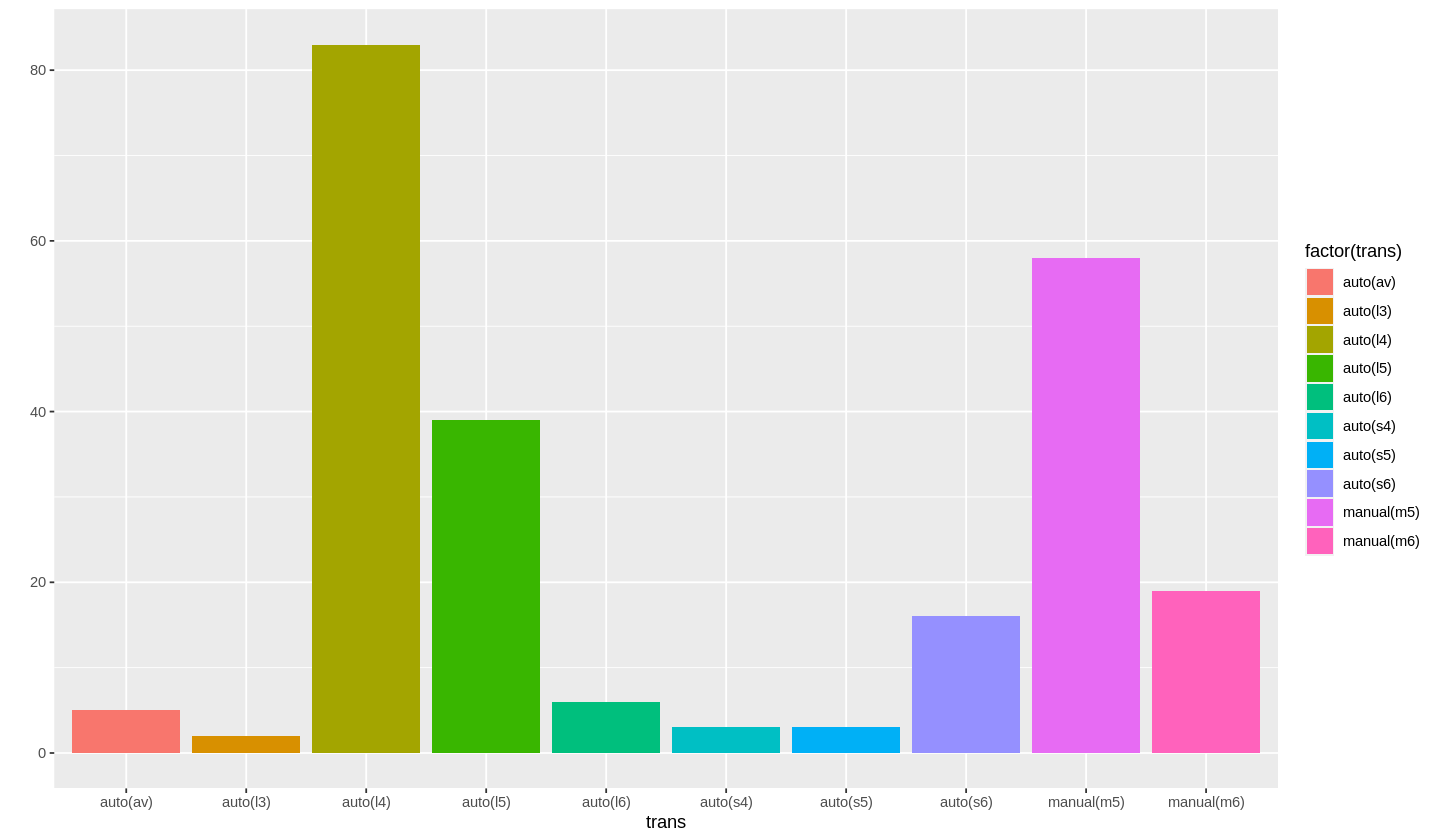

In [15]:
qplot(trans, data=mpg, geom="bar", fill=factor(trans))

#### **Millas en ciudad**

In [16]:
summary(mpg$cty)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   14.00   17.00   16.86   19.00   35.00 

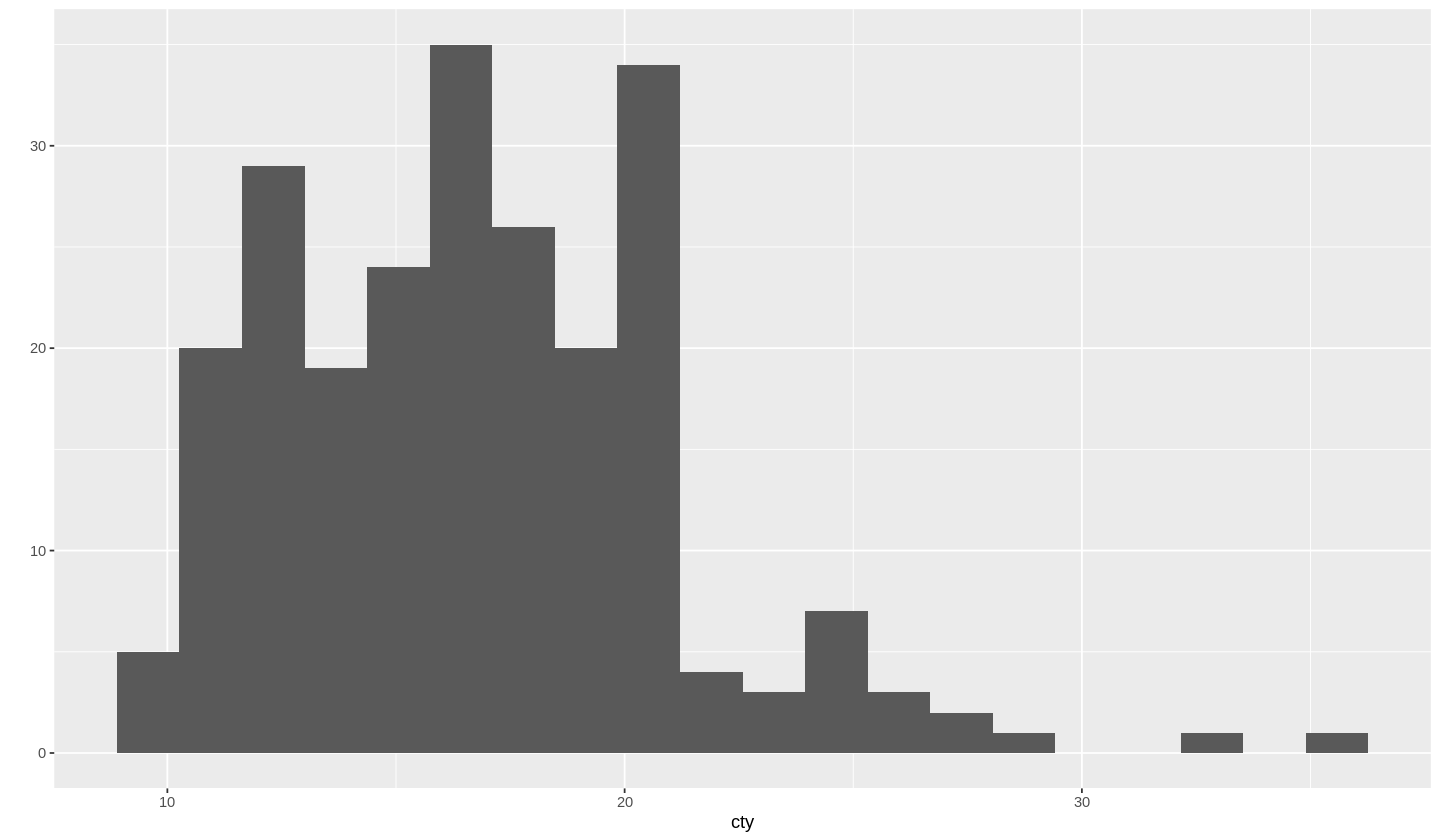

In [17]:
qplot(cty, data=mpg, geom="histogram", bins=20)

#### **Tipo de combustible**

In [18]:
table(mpg$fl)


  c   d   e   p   r 
  1   5   8  52 168 

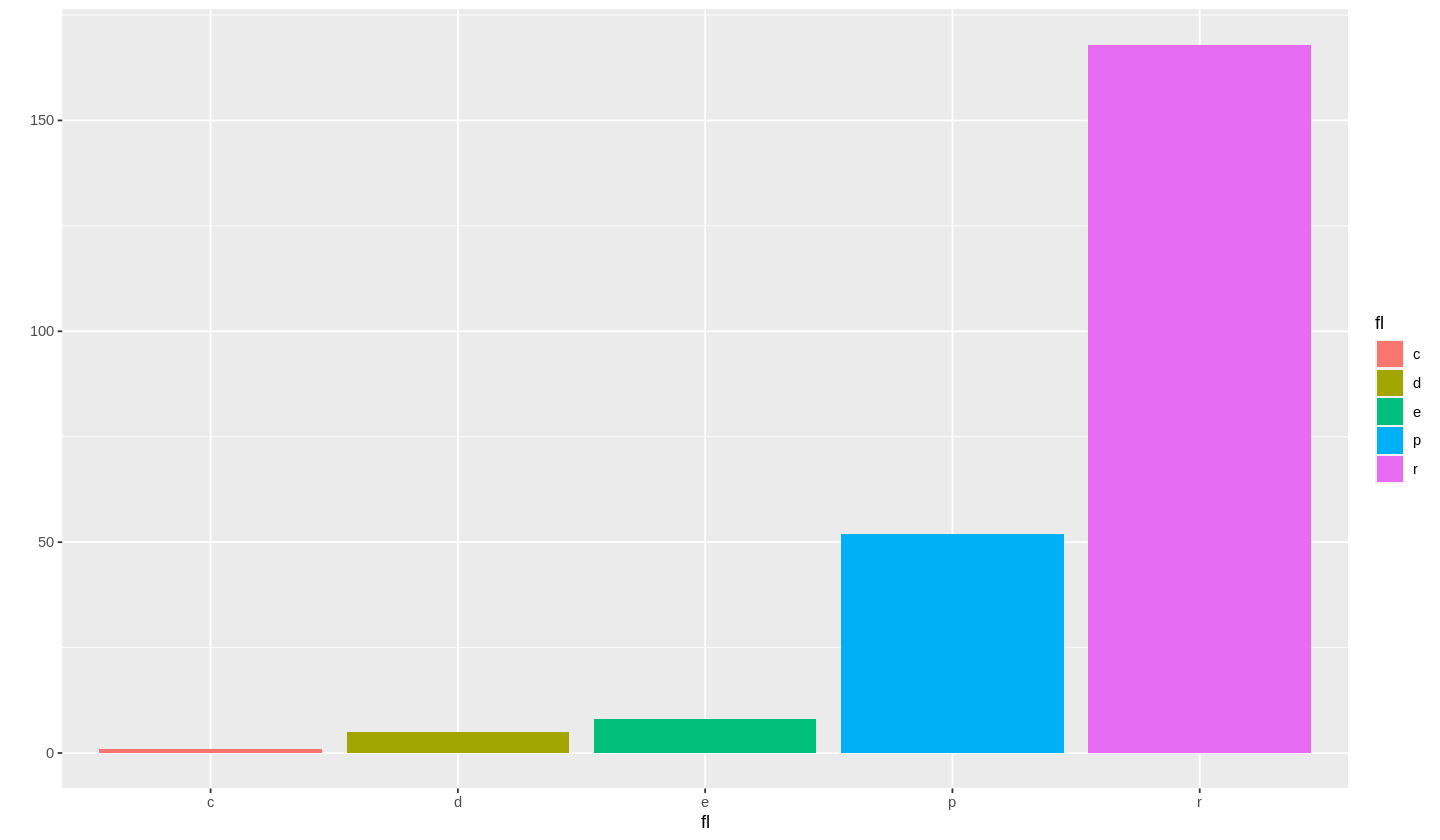

In [19]:
qplot(fl, data=mpg, geom="bar", fill=fl)

#### **Clase de vehiculo**

In [20]:
table(mpg$class)


   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

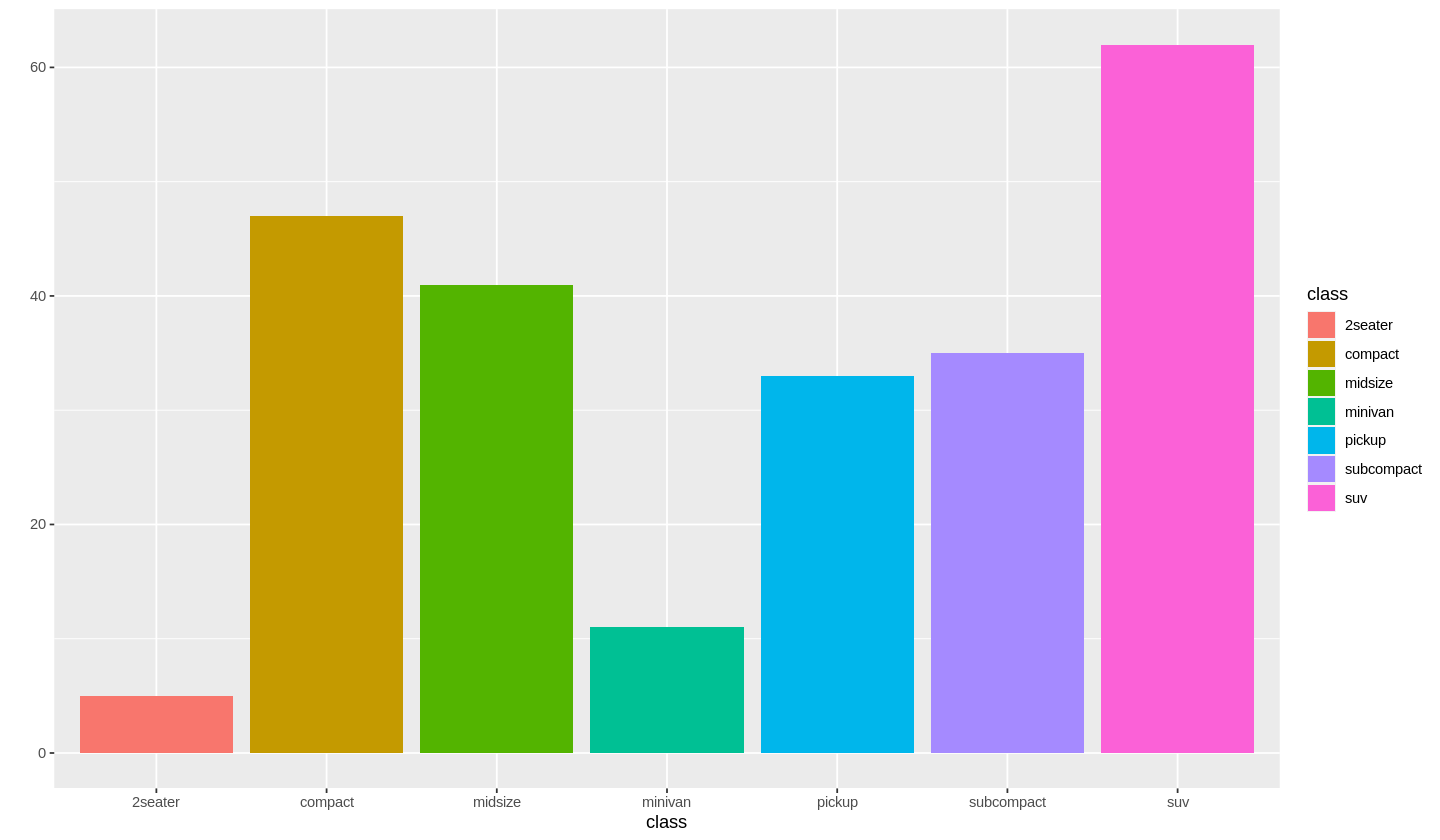

In [21]:
qplot(class, data=mpg, geom="bar", fill=class)

### **Otros análisis**

#### **Millas recorridas vs. consumo en ruta**

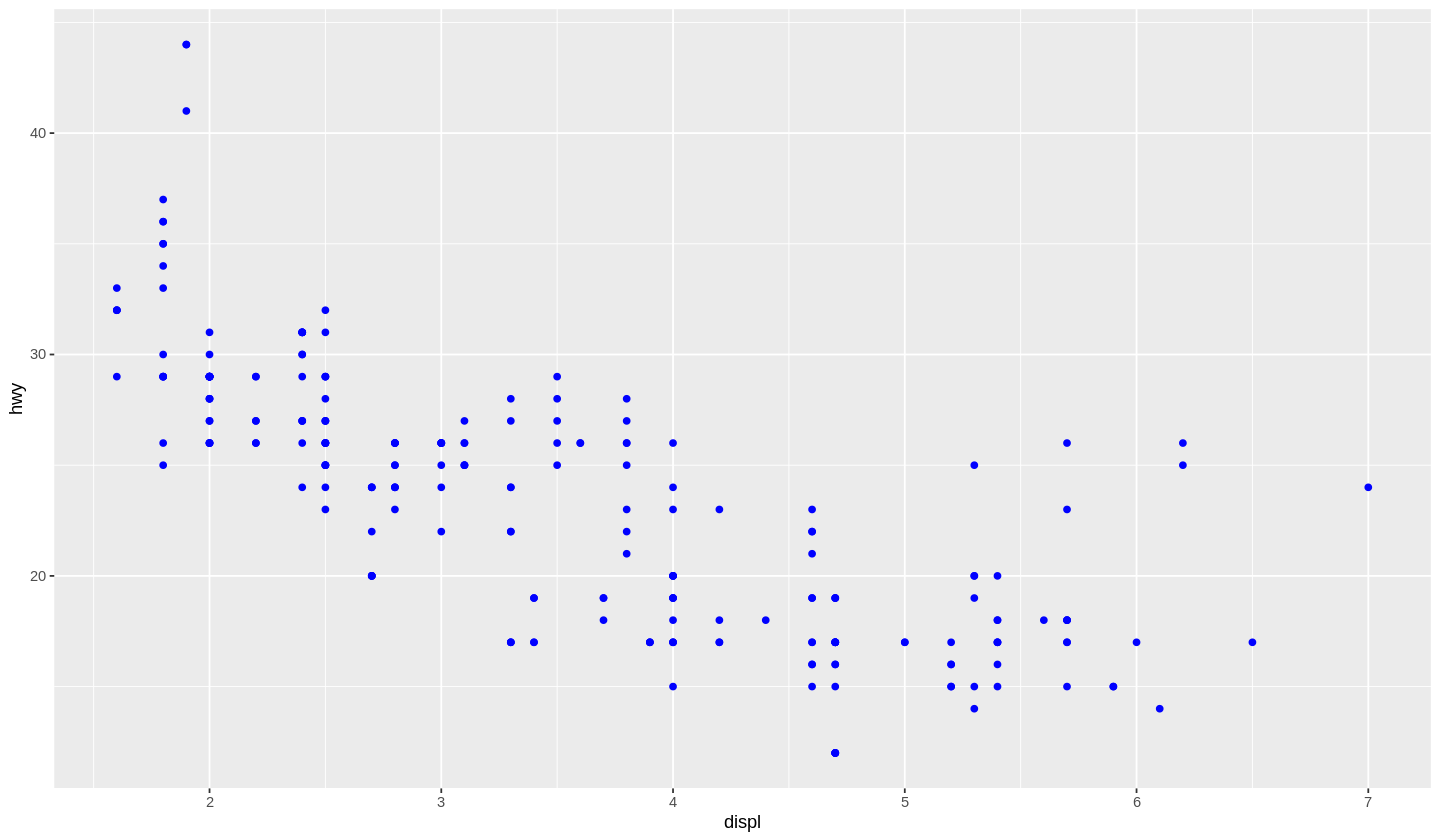

In [22]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color='blue')

Mismo gráfico, con qplot...

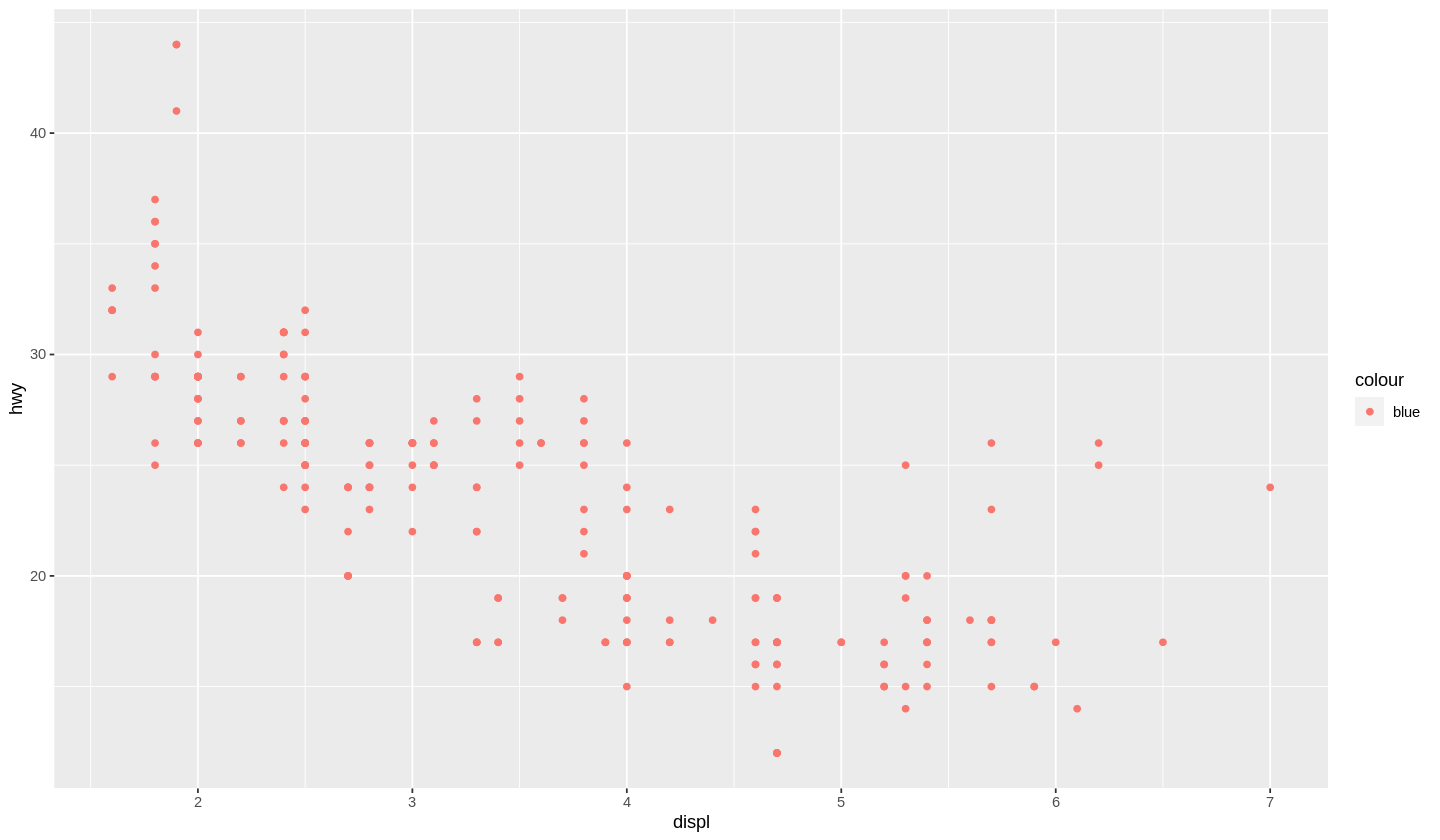

In [23]:
qplot(displ, hwy, data=mpg, geom="point", color='blue')

Discriminado por clase de vehículo...

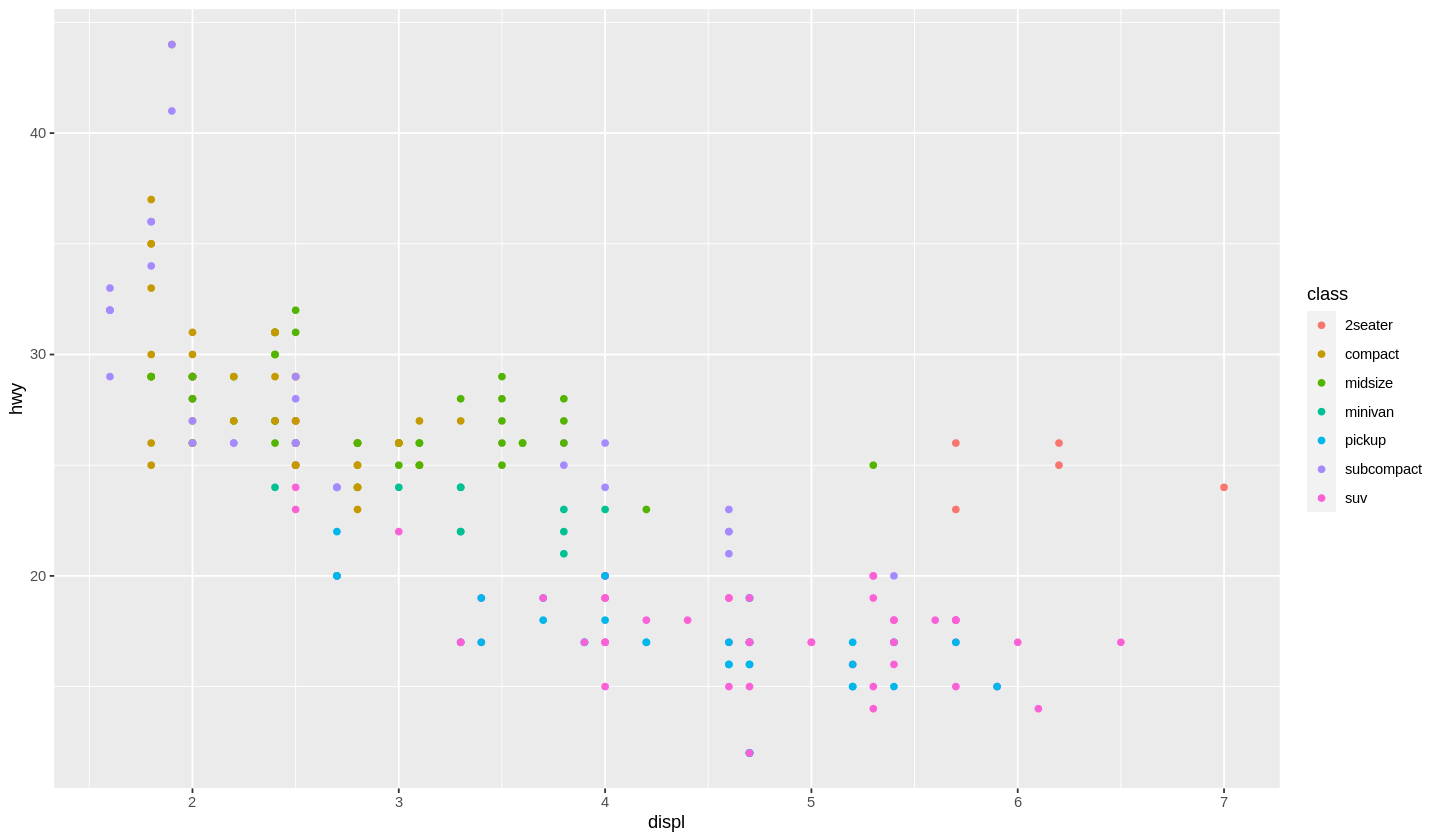

In [24]:
qplot(displ, hwy, data=mpg, geom="point", color=class)

Separando...

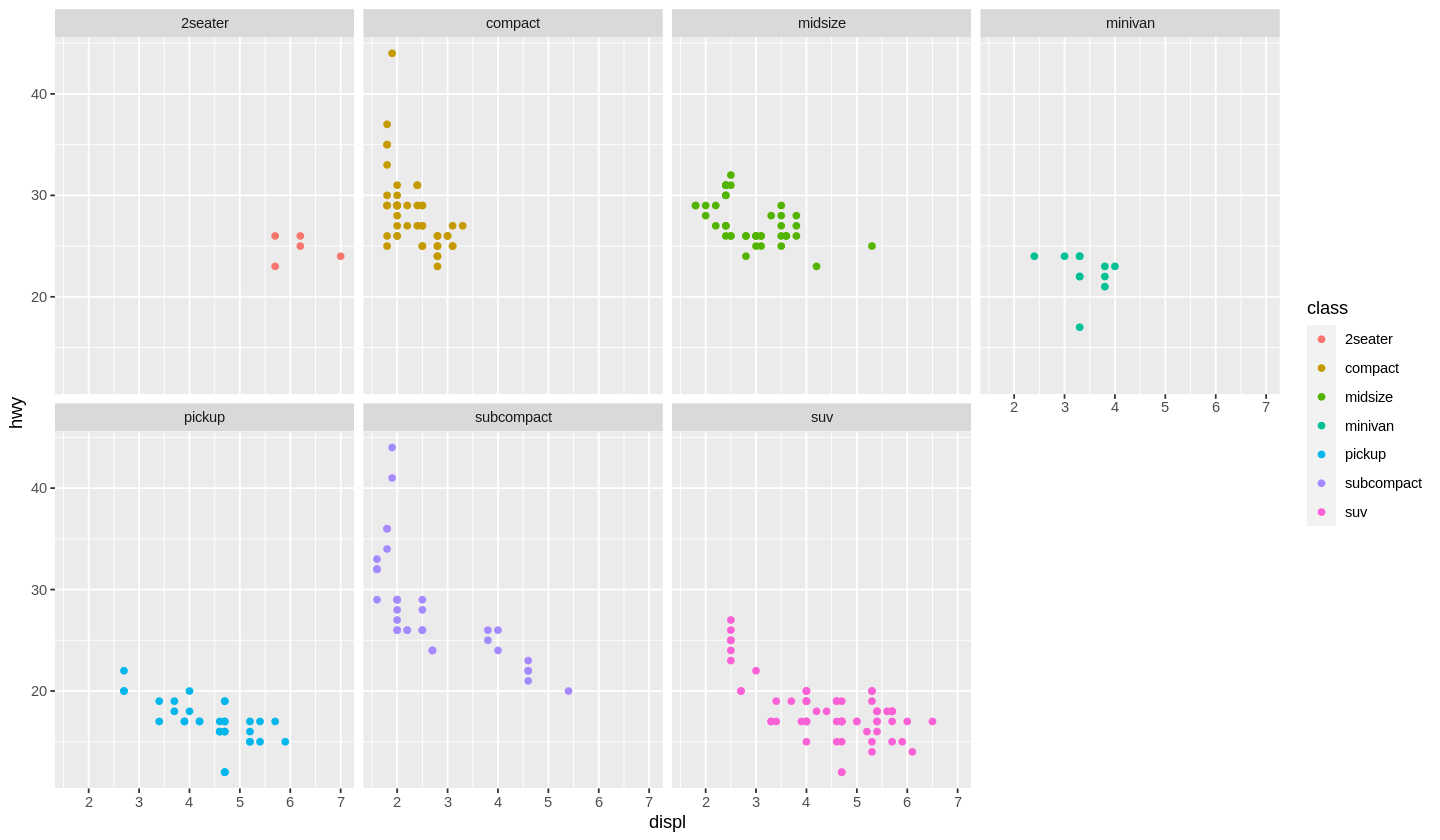

In [25]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class)) +
  facet_wrap(~ class, nrow = 2)